In [42]:
import numpy as np 
import pandas as pd
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 
import re
from tqdm.auto import tqdm

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import matplotlib
# So that we can edit the text in illustrator
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'

fig_out_dir = Path("final_figures/figure_4")
fig_out_dir.mkdir(exist_ok=True, parents=True)



### Note: rooms run with reverb! Room used in test is anechoic simulation of MIT 46-1004

In [43]:
results_dir = Path('final_results_dir')
results_dir.mkdir(parents=True, exist_ok=True)

In [44]:
all_conditions = pd.read_pickle("binaural_test_manifests/all_target_distractor_pairs.pkl")

In [45]:
len(all_conditions) / 35

1814.4

In [46]:
len(all_conditions)

63504

In [6]:
results_dir = Path('binaural_eval/simulate_all_target_distractor_location_pairs/')
model = 'word_task_v10_main_feature_gain_config'

output_paths = list((results_dir / model).glob("*.pkl"))
len(output_paths)

63504

In [7]:
# output_paths

In [8]:
remap_azim = lambda azim: 360 - azim if azim > 180 else 0 - azim 


In [9]:
# # from concurrent.futures import ThreadPoolExecutor
# from multiprocessing import Pool, cpu_count

# from functools import partial

# results_dir = Path('binaural_eval/simulate_all_target_distractor_location_pairs/')
# model = 'word_task_v10_main_feature_gain_config'

# output_paths = list((results_dir / model).glob("*.pkl"))



# def process_path(path):
#     stim_manifest_df = pd.read_pickle('/om/user/imgriff/datasets/human_word_rec_SWC_2024/full_cue_target_distractor_df_w_meta.pdpkl')
#     remap_azim = lambda azim: 360 - azim if azim > 180 else 0 - azim 
#     word_class_map = pickle.load(open("/om2/user/imgriff/datasets/commonvoice_9/en/cv_800_word_label_to_int_dict.pkl", "rb"))
#     ix_to_word = {v: k for k, v in word_class_map.items()}
#     gend_map = {True: 'Same sex', False: 'Different sex'}
#     model_name_dict = {'word_task_v10_main_feature_gain_config': "Feature-gain Model"}

#     res_dict = pickle.load(open(path, 'rb'))
#     df = pd.DataFrame.from_dict(res_dict)
#     df['model'] = path.parent.stem
#     df.rename(columns={"results": "accuracy"}, inplace=True)
#     df.loc[df.index.values, ['word', 'distractor_word', 'sex_cond']] = stim_manifest_df.loc[df.stim_ix_list.values, ['word', 'distractor_word', 'sex_cond']].values
#     df['target_word'] = df['true_word_int'].map(ix_to_word)
#     df['pred_word'] = df['preds'].map(ix_to_word)
#     df['correct'] = (df['true_word_int'] == df['preds']).astype('int')
#     df['confusions'] = df[['pred_word', 'distractor_word']].apply(lambda x: 1 if x.pred_word in x.distractor_word else 0, axis=1)
#     if 'clean' in path.stem:
#         snr = 'clean'
#     else:
#         snr = int(re.search('(-?\d+)_SNR', path.stem).group(0).strip('_SNR'))
#     df['snr'] = snr
#     df["target_azim_raw"], df["target_elev"] = path.stem.split('target_loc_')[1].split('_distract_loc_')[0].split('_')
#     df["distractor_azim_raw"], df["distractor_elev"] = path.stem.split('_distract_loc_')[1].split('_')[:2]
#     # map azim to 0-180
#     df['target_azim'] = df['target_azim_raw'].astype(int).apply(remap_azim)
#     df['distractor_azim'] = df['distractor_azim_raw'].astype(int).apply(remap_azim)
#     df['target_elev'] = df['target_elev'].astype(int)
#     df['distractor_elev'] = df['distractor_elev'].astype(int)

#     summary_df = df.groupby(['target_azim', 'target_elev', 'distractor_azim', 'distractor_elev', 'snr', 'model']).agg({'accuracy': ['mean', 'sem'],
#                                                                                                                        'confusions': ['mean', 'sem']}).reset_index()
#     summary_df.columns = ['_'.join(col).strip() for col in summary_df.columns.values]
#     # remove trailing underscore
#     summary_df.columns = [col[:-1] if col[-1] == '_' else col for col in summary_df.columns.values]

#     summary_df.rename(columns={"accuracy_mean": "accuracy", "accuracy_sem": "accuracy_sem"}, inplace=True)
#     summary_df.rename(columns={"confusions_mean": "confusions", "confusions_sem": "confusions_sem"}, inplace=True)

#     return summary_df

# with Pool(processes=cpu_count()) as pool:
#     process_func = partial(process_path)
#     results_dfs = list(tqdm(pool.imap(process_func, output_paths), total=len(output_paths)))

# results = pd.concat(results_dfs)

In [ ]:
# out_dir = Path('final_results_dir')
# out_dir.mkdir(parents=True, exist_ok=True)
# out_name = 'feature_gain_main_v10_all_1_distractor_spatial_configurations_raw.pdkl'
# results.to_pickle(out_dir / out_name)

# Open pre saved data 



In [47]:
out_dir = Path('final_results_dir')
out_dir.mkdir(parents=True, exist_ok=True)
out_name = out_dir / 'feature_gain_main_v10_all_1_distractor_spatial_configurations_raw.pdkl'
results = pd.read_pickle(out_name)

In [48]:
n_unique_elevations = results.target_elev.nunique()
n_unique_azimuths = results.target_azim.nunique()


In [50]:
# from tqdm.auto import tqdm

# run_coords = set(
#     zip(
#         results['target_azim'], results['target_elev'],
#         results['distractor_azim'], results['distractor_elev']
#     )
# )

# # Find indices in the dictionary not present in the DataFrame
# missing_ixs = []
# for ix, items in all_conditions.items():
#     target = items['target_loc']
#     distractor = items['distract_loc']
#     if (remap_azim(target[0]), target[1], remap_azim(distractor[0]), distractor[1]) not in run_coords:
#         missing_ixs.append(ix)
# len(missing_ixs)

# Main confusion matrices 

In [51]:
results

,target_azim,target_elev,distractor_azim,distractor_elev,snr,model,accuracy,accuracy_sem,confusions,confusions_sem
0,0,-10,0,-10,0,word_task_v10_main_feature_gain_config,0.514344,0.011315,0.117828,0.007299
0,0,-10,0,-20,0,word_task_v10_main_feature_gain_config,0.510758,0.011317,0.115779,0.007244
0,0,-10,0,0,0,word_task_v10_main_feature_gain_config,0.509734,0.011318,0.117316,0.007285
0,0,-10,0,10,0,word_task_v10_main_feature_gain_config,0.513832,0.011316,0.113217,0.007174
0,0,-10,0,20,0,word_task_v10_main_feature_gain_config,0.527152,0.011303,0.091701,0.006534
...,...,...,...,...,...,...,...,...,...,...
0,-90,40,-90,0,0,word_task_v10_main_feature_gain_config,0.549693,0.011264,0.090676,0.006501
0,-90,40,-90,10,0,word_task_v10_main_feature_gain_config,0.547131,0.011269,0.086578,0.006367
0,-90,40,-90,20,0,word_task_v10_main_feature_gain_config,0.538934,0.011285,0.094775,0.006631
0,-90,40,-90,30,0,word_task_v10_main_feature_gain_config,0.528176,0.011302,0.102459,0.006866


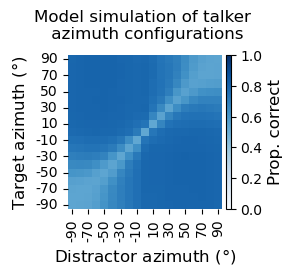

In [ ]:
### plot 90 to 90 azimuth, averaging over elevation as heatmap 
fontsize=12
fig, ax = plt.subplots(figsize=(2,2))
azims_to_plot = np.arange(-90, 91, 10)
df_for_azim_heatmap = results[(results.target_azim.isin(azims_to_plot)) & (results.distractor_azim.isin(azims_to_plot))].copy()
acc_to_plot = df_for_azim_heatmap.groupby(['target_azim', "distractor_azim"])['accuracy'].mean().unstack()
acc_heatmap = sns.heatmap(acc_to_plot, vmin=0, vmax=1, cmap='Blues', cbar=False, ax=ax, square=True,)# linewidths=0.48,  linecolor='k')

# Add common colorbars for each row
cbar_ax_acc = fig.add_axes([0.92, 0.11, 0.022, 0.77])  # [left, bottom, width, height]

plt.colorbar(acc_heatmap.get_children()[0], cax=cbar_ax_acc)
# increase colorbar label fontsize 
# cbar_ax_acc.tick_params(labelsize=fontsize)
# set colorbar label
cbar_ax_acc.set_ylabel('Prop. correct', fontsize=fontsize)


ax.set_xlabel('Distractor azimuth ($\degree$)', fontsize=fontsize)
ax.set_ylabel('Target azimuth ($\degree$)', fontsize=fontsize)
ax.set_title("Model simulation of talker \n azimuth configurations", y=1.05, fontsize=fontsize)
ax.invert_yaxis()
ax.set_aspect('equal')
# plt.savefig(fig_out_dir / "figure_4_model_azim_summary_no_lines.pdf", transparent=True, bbox_inches='tight')

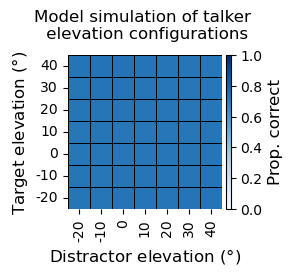

In [ ]:
### plot 90 to 90 azimuth, averaging over elevation as heatmap 
fontsize=12
fig, ax = plt.subplots(figsize=(2,2))
elevs_to_plot = np.arange(-20, 41, 10)
df_for_azim_heatmap = results[(results.target_elev.isin(elevs_to_plot)) & (results.distractor_elev.isin(elevs_to_plot))].copy()
acc_to_plot = df_for_azim_heatmap.groupby(['target_elev', "distractor_elev"])['accuracy'].mean().unstack()
acc_heatmap = sns.heatmap(acc_to_plot, vmin=0, vmax=1, cmap='Blues', cbar=False, ax=ax, square=True, linewidths=0.5, linecolor='k', robust=True)

# Add common colorbars for each row
cbar_ax_acc = fig.add_axes([0.92, 0.11, 0.022, 0.77])  # [left, bottom, width, height]

plt.colorbar(acc_heatmap.get_children()[0], cax=cbar_ax_acc)
# increase colorbar label fontsize 
# cbar_ax_acc.tick_params(labelsize=fontsize)
# set colorbar label
cbar_ax_acc.set_ylabel('Prop. correct', fontsize=fontsize)


ax.set_xlabel('Distractor elevation ($\degree$)', fontsize=fontsize)
ax.set_ylabel('Target elevation ($\degree$)', fontsize=fontsize)
ax.set_title("Model simulation of talker \n elevation configurations", y=1.05, fontsize=fontsize)

ax.invert_yaxis()
ax.set_aspect('equal')
# plt.savefig(fig_out_dir / "figure_4_model_elevation_summary.pdf", transparent=True, bbox_inches='tight')

## Confusion matrices for supplement 

In [20]:
fig_out_dir = Path("final_figures/sup_fig_2")
fig_out_dir.mkdir(exist_ok=True, parents=True)


### Plot target x distractor azimuth at all elevations 

/tmp/ipykernel_2931531/3983672199.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbars


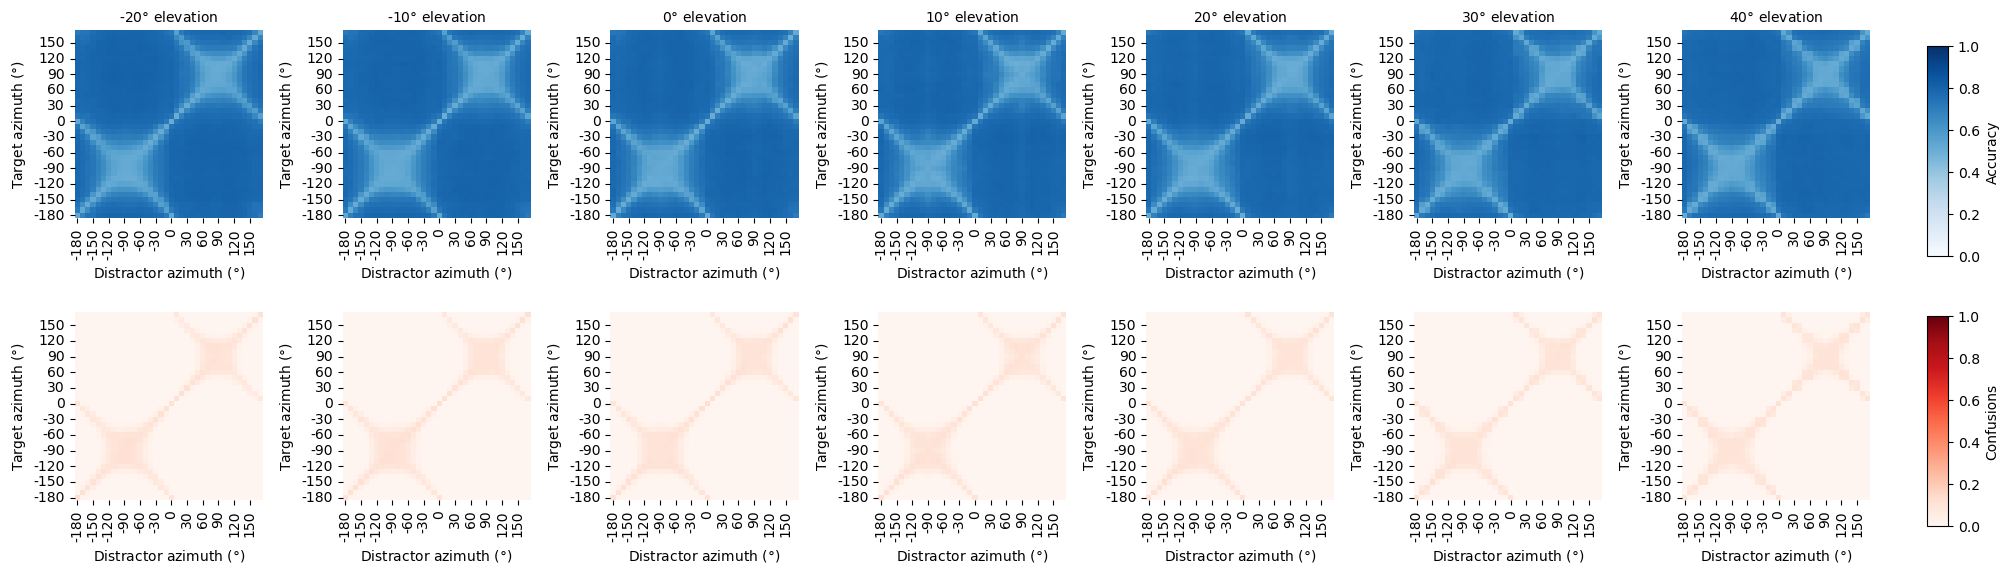

In [ ]:
n_rows = 2  # top row will be accuracy, bottom row will be confusions
n_cols = n_unique_elevations  # number of unique elevations

aspect = 3
fontsize = 10

figsize = (n_cols * aspect, n_rows * aspect)
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=False, sharey=False)

# Create lists to store the heatmaps for adding colorbars later
acc_heatmaps = []
conf_heatmaps = []

for i, elev in enumerate(sorted(results.target_elev.unique())):
    # Get performance where sources are co-located in elevation
    elev_df = results[(results.target_elev == elev) & (results.distractor_elev == elev)]

    acc_to_plot = elev_df.groupby(['target_azim', "distractor_azim"])['accuracy'].mean().unstack()
    acc_heatmap = sns.heatmap(acc_to_plot, vmin=0, vmax=1, cmap='Blues', cbar=False, ax=axes[0, i], square=True, robust=True)
    acc_heatmaps.append(acc_heatmap)

    conf_to_plot = elev_df.groupby(['target_azim', "distractor_azim"])['confusions'].mean().unstack()
    conf_heatmap = sns.heatmap(conf_to_plot, vmin=0, vmax=1, cmap='Reds', cbar=False, ax=axes[1, i], square=True, robust=True)
    conf_heatmaps.append(conf_heatmap)

    axes[0, i].set_title(f"{elev}$\degree$ elevation", fontsize=fontsize)

# Add common colorbars for each row
cbar_ax_acc = fig.add_axes([0.92, 0.55, 0.01, 0.35])  # [left, bottom, width, height]
cbar_ax_conf = fig.add_axes([0.92, 0.1, 0.01, 0.35])  # [left, bottom, width, height]

plt.colorbar(acc_heatmaps[0].get_children()[0], cax=cbar_ax_acc, label="Accuracy")
plt.colorbar(conf_heatmaps[0].get_children()[0], cax=cbar_ax_conf, label="Confusions")

for ax in axes.ravel():
    ax.set_xlabel('Distractor azimuth ($\degree$)', fontsize=fontsize)
    ax.set_ylabel('Target azimuth ($\degree$)', fontsize=fontsize)
    ax.invert_yaxis()
    ax.set_aspect('equal')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbars

/tmp/ipykernel_166673/2905888671.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbars


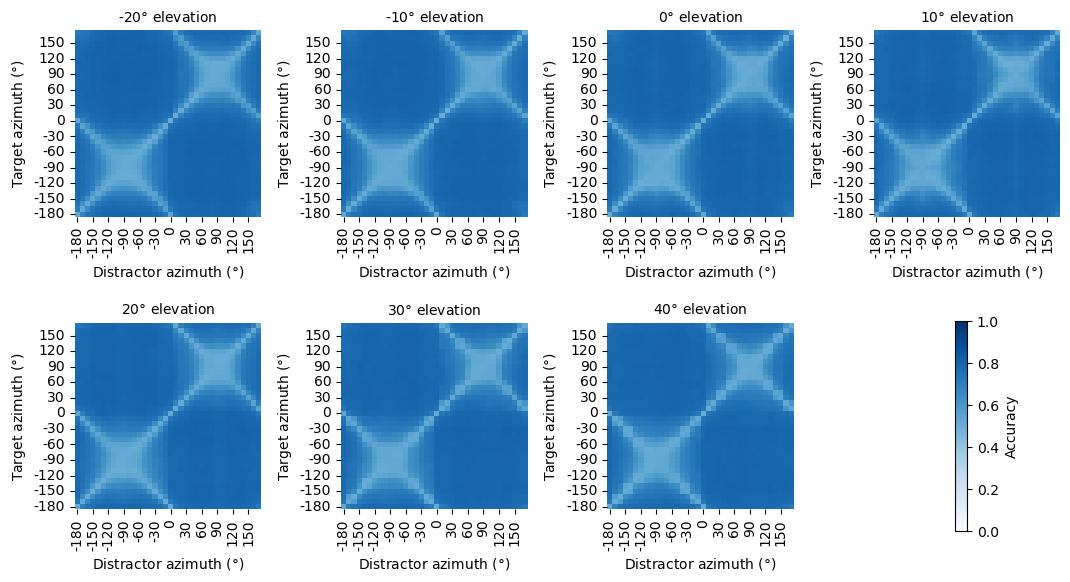

In [39]:
n_rows = 2  # top row will be accuracy, bottom row will be confusions
n_cols = int(np.ceil(n_unique_elevations / n_rows)) # number of unique elevations

aspect = 3
fontsize = 10

figsize = (n_cols * aspect, n_rows * aspect)
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=False, sharey=False)
axes = axes.ravel()
# Create lists to store the heatmaps for adding colorbars later
acc_heatmaps = []
conf_heatmaps = []

for i, elev in enumerate(sorted(results.target_elev.unique())):
    # Get performance where sources are co-located in elevation
    elev_df = results[(results.target_elev == elev) & (results.distractor_elev == elev)]

    acc_to_plot = elev_df.groupby(['target_azim', "distractor_azim"])['accuracy'].mean().unstack()
    acc_heatmap = sns.heatmap(acc_to_plot, vmin=0, vmax=1, cmap='Blues', cbar=False, ax=axes[i], square=True, )#linewidths=  linecolor='darkgrey')
    acc_heatmaps.append(acc_heatmap)
    axes[i].set_title(f"{elev}$\degree$ elevation", fontsize=fontsize)

# Add common colorbars for each row
cbar_ax_acc = fig.add_axes([0.8, 0.1, 0.01, 0.35])  # [left, bottom, width, height]

plt.colorbar(acc_heatmaps[-1].get_children()[0], cax=cbar_ax_acc, label="Accuracy")

for ax in axes.ravel():
    ax.set_xlabel('Distractor azimuth ($\degree$)', fontsize=fontsize)
    ax.set_ylabel('Target azimuth ($\degree$)', fontsize=fontsize)
    ax.invert_yaxis()
    ax.set_aspect('equal')

axes[-1].axis('off')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbars
plt.savefig(fig_out_dir / "azim_x_azim_per_elevation.pdf", transparent=True, bbox_inches='tight')

## Plot the azimuth results

Will plot accuracy and confusions as separate figures

In [40]:
fig_out_dir = Path("final_figures/sup_fig_3")
fig_out_dir.mkdir(exist_ok=True, parents=True)


### Accuracy

/tmp/ipykernel_166673/2831587897.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbars


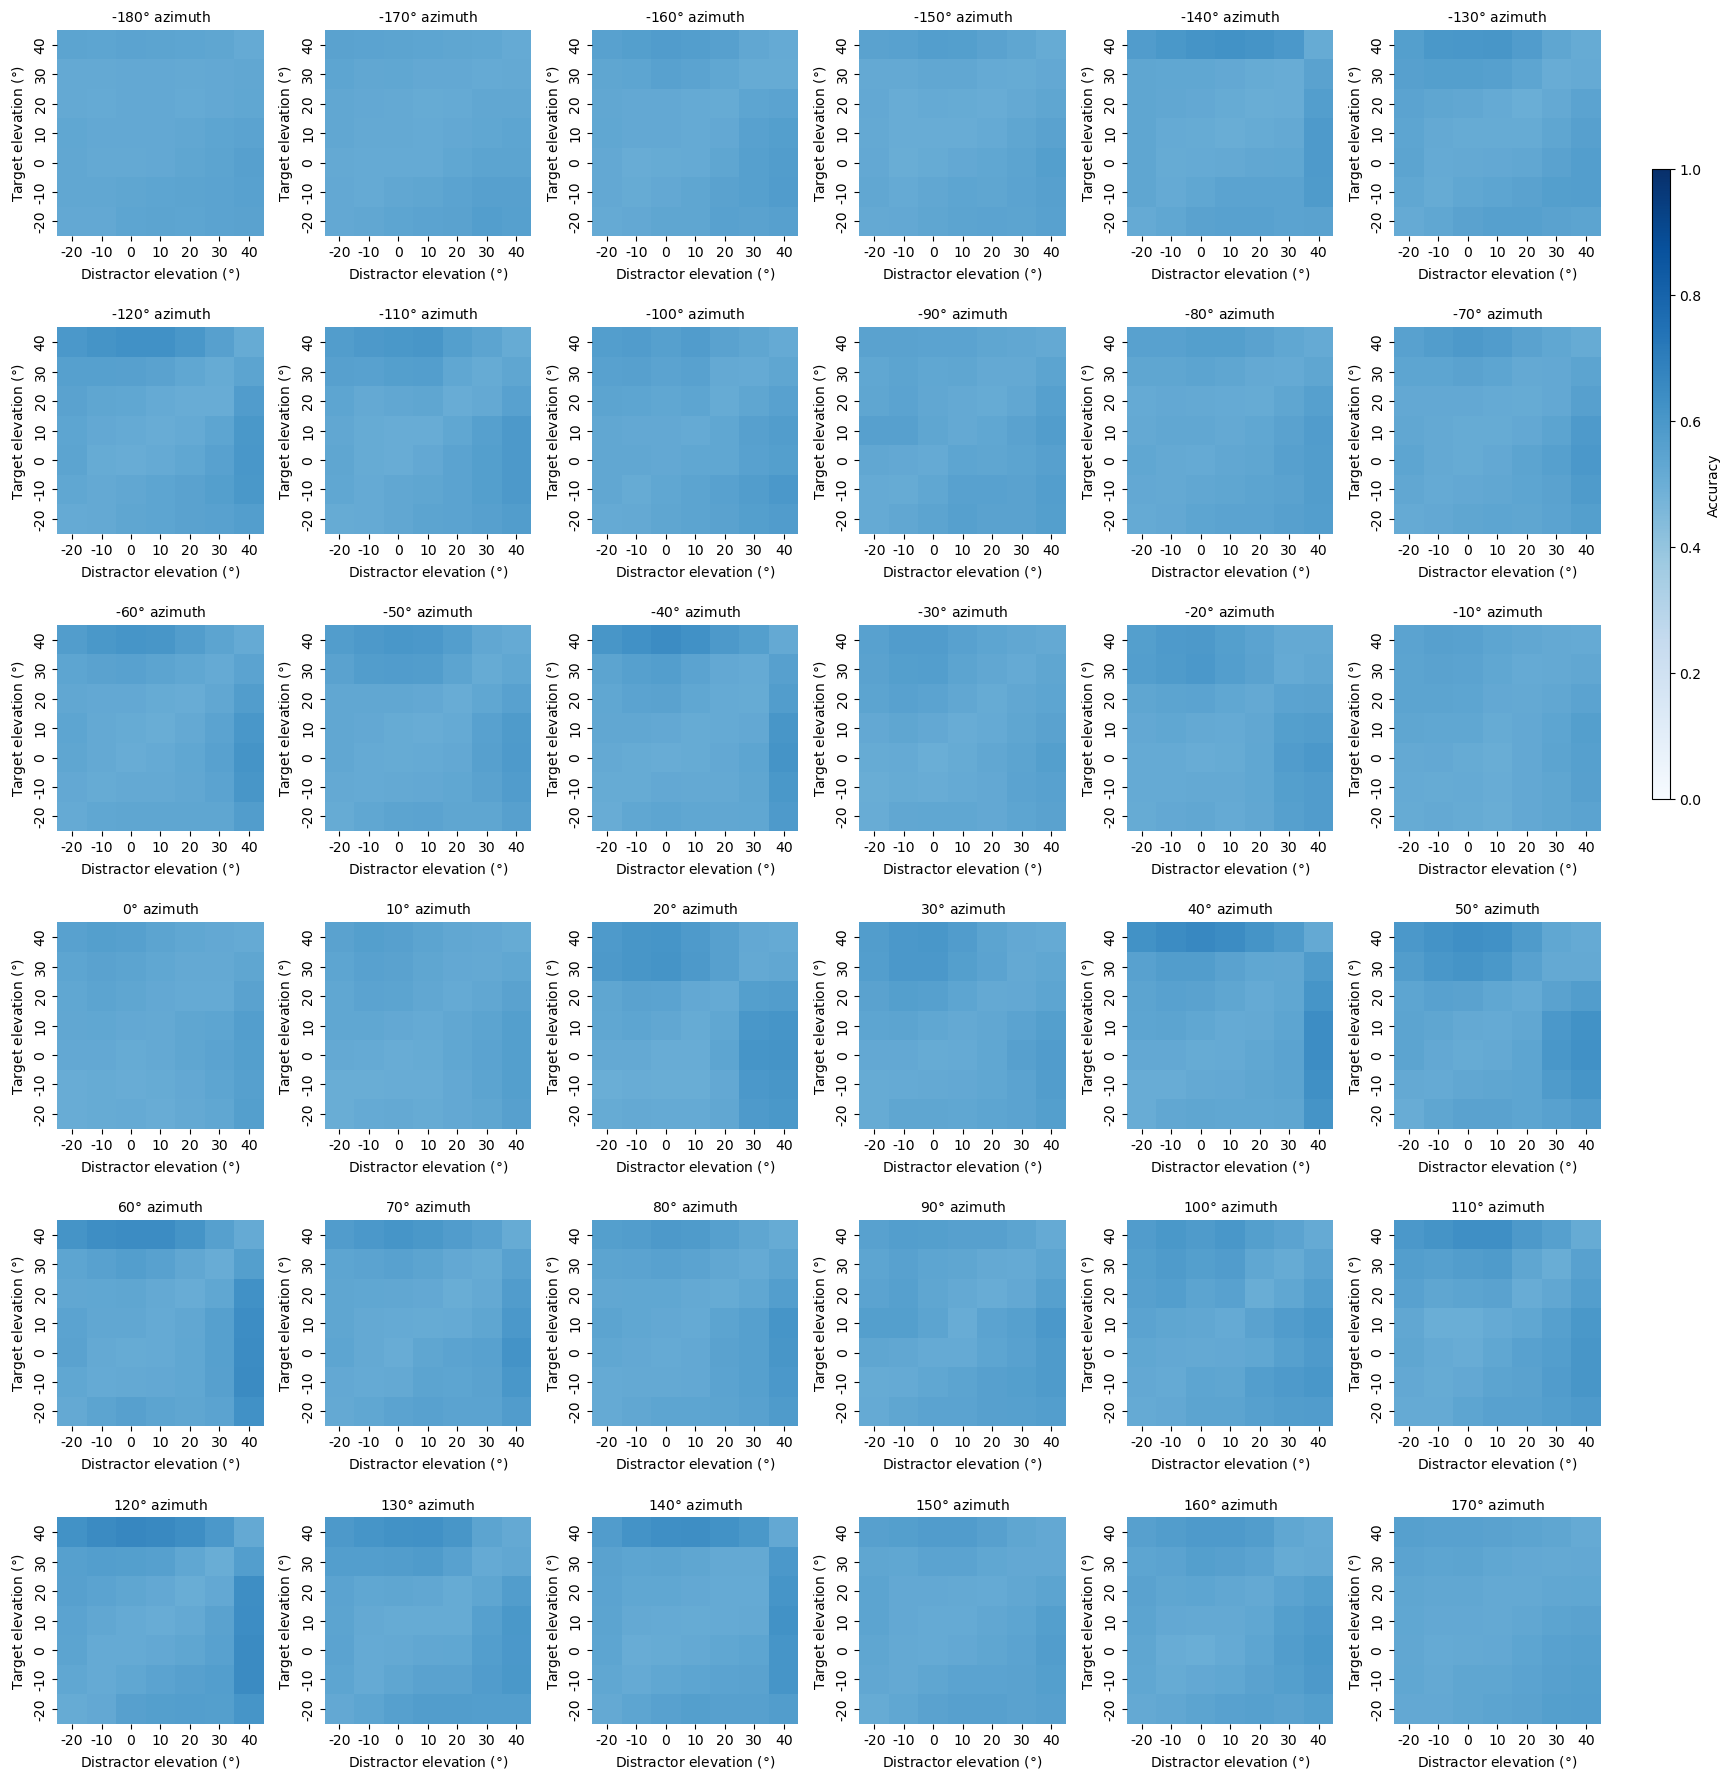

In [41]:
n_azims = n_unique_azimuths  # number of unique azimuths
n_cols = 6 
n_rows = n_azims // n_cols + (n_azims % n_cols > 0)  # number of rows needed to fit all azimuths

aspect = 3
fontsize = 10

figsize = (n_cols * aspect, n_rows * aspect)
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=False, sharey=False)
axes = axes.flatten()
# Create lists to store the heatmaps for adding colorbars later
acc_heatmaps = []
conf_heatmaps = []

for i, azim in enumerate(sorted(results.target_azim.unique())):
    # Get performance where sources are co-located in elevation
    azim_df = results[(results.target_azim == azim) & (results.distractor_azim == azim)]

    acc_to_plot = azim_df.groupby(['target_elev', "distractor_elev"])['accuracy'].mean().unstack()
    acc_heatmap = sns.heatmap(acc_to_plot, vmin=0, vmax=1, cmap='Blues', cbar=False, ax=axes[i], square=True, robust=True)
    acc_heatmaps.append(acc_heatmap)

    # conf_to_plot = elev_df.groupby(['target_azim', "distractor_azim"])['confusions'].mean().unstack()
    # conf_heatmap = sns.heatmap(conf_to_plot, vmin=0, vmax=1, cmap='Reds', cbar=False, ax=axes[1, i], square=True, robust=True)
    # conf_heatmaps.append(conf_heatmap)

    axes[i].set_title(f"{azim}$\degree$ azimuth", fontsize=fontsize)
    

# Add common colorbars for each row
cbar_ax_acc = fig.add_axes([0.92, 0.55, 0.01, 0.35])  # [left, bottom, width, height]
# cbar_ax_conf = fig.add_axes([0.92, 0.1, 0.01, 0.35])  # [left, bottom, width, height]

plt.colorbar(acc_heatmaps[0].get_children()[0], cax=cbar_ax_acc, label="Accuracy")
# plt.colorbar(conf_heatmaps[0].get_children()[0], cax=cbar_ax_conf, label="Confusions")

for ax in axes.ravel():
    ax.set_xlabel('Distractor elevation ($\degree$)', fontsize=fontsize)
    ax.set_ylabel('Target elevation ($\degree$)', fontsize=fontsize)
    ax.invert_yaxis()
    ax.set_aspect('equal')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbars
plt.savefig(fig_out_dir / "elev_x_elev_per_azim.pdf", transparent=True, bbox_inches='tight')

/tmp/ipykernel_2760112/3551811629.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbars


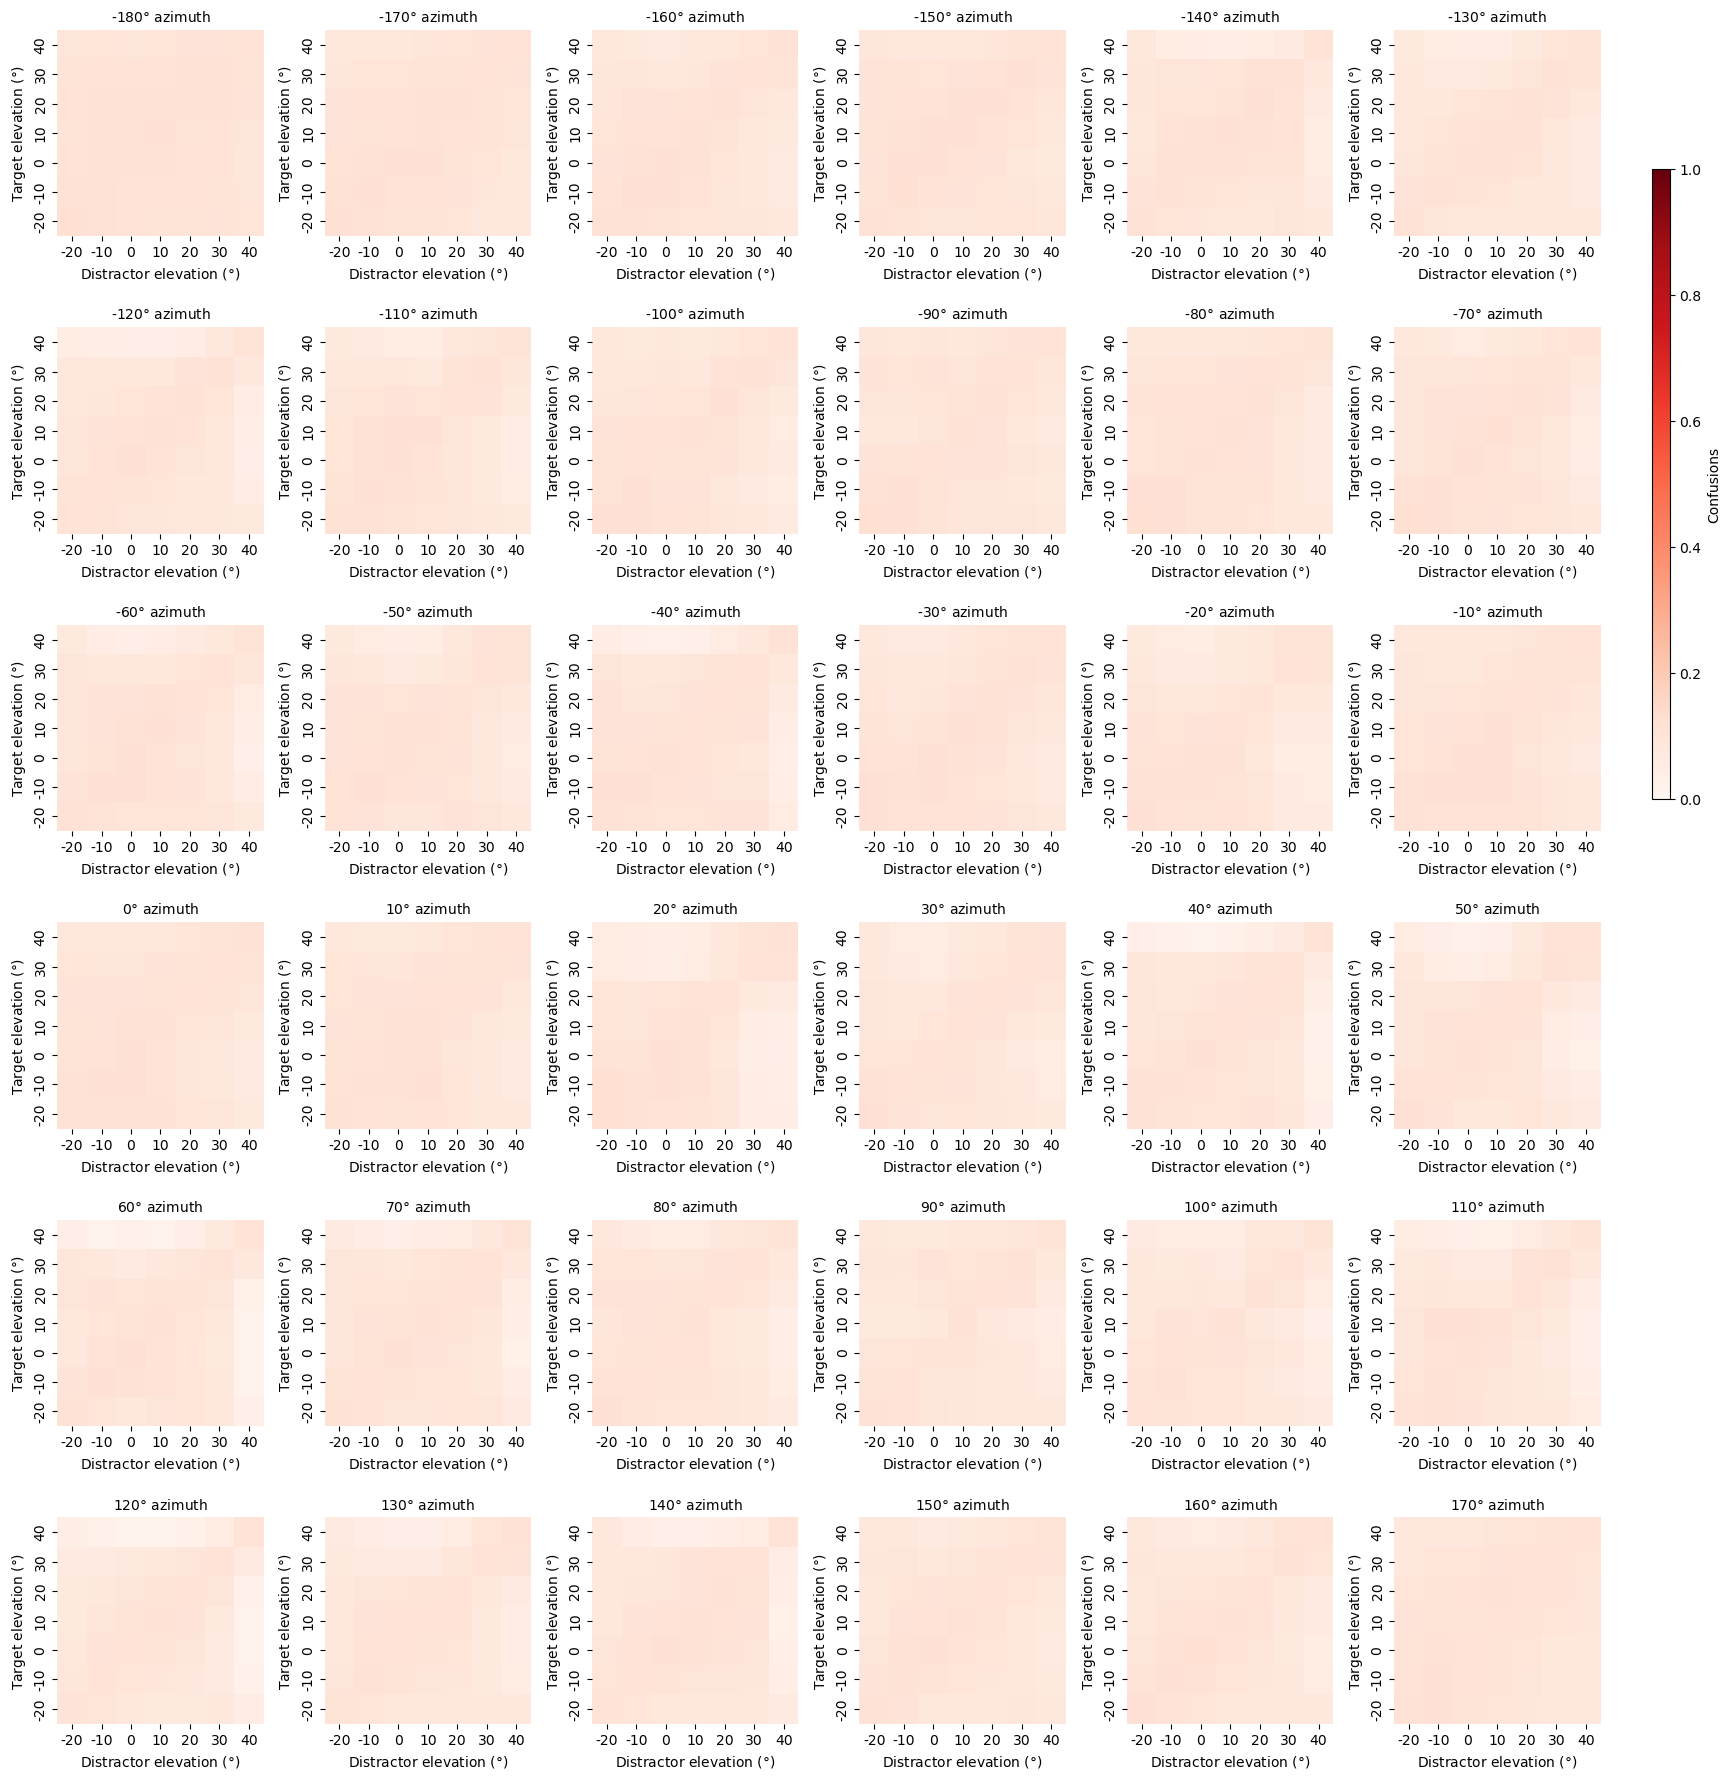

In [18]:
n_azims = n_unique_azimuths  # number of unique azimuths
n_cols = 6 
n_rows = n_azims // n_cols + (n_azims % n_cols > 0)  # number of rows needed to fit all azimuths

aspect = 3
fontsize = 10

figsize = (n_cols * aspect, n_rows * aspect)
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=False, sharey=False)
axes = axes.flatten()
# Create lists to store the heatmaps for adding colorbars later
conf_heatmaps = []

for i, azim in enumerate(sorted(results.target_azim.unique())):
    # Get performance where sources are co-located in elevation
    azim_df = results[(results.target_azim == azim) & (results.distractor_azim == azim)]

    conf_to_plot = azim_df.groupby(['target_elev', "distractor_elev"])['confusions'].mean().unstack()
    conf_heatmap = sns.heatmap(conf_to_plot, vmin=0, vmax=1, cmap='Reds', cbar=False, ax=axes[i], square=True, robust=True)
    conf_heatmaps.append(conf_heatmap)

    # conf_to_plot = elev_df.groupby(['target_azim', "distractor_azim"])['confusions'].mean().unstack()

    axes[i].set_title(f"{azim}$\degree$ azimuth", fontsize=fontsize)
    

# Add common colorbars for each row
cbar_ax_conf = fig.add_axes([0.92, 0.55, 0.01, 0.35])  # [left, bottom, width, height]

plt.colorbar(conf_heatmaps[0].get_children()[0], cax=cbar_ax_conf, label="Confusions")

for ax in axes.ravel():
    ax.set_xlabel('Distractor elevation ($\degree$)', fontsize=fontsize)
    ax.set_ylabel('Target elevation ($\degree$)', fontsize=fontsize)
    ax.invert_yaxis()
    ax.set_aspect('equal')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbars